# **Task 4: A/B Testing Analysis**

---



In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats

# Simulated A/B test data
data = {
    'Group': np.random.choice(['A', 'B'], 1000),
    'Conversion': np.random.binomial(1, p=[0.2 if group == 'A' else 0.25 for group in np.random.choice(['A', 'B'], 1000)])
}

df = pd.DataFrame(data)

# Group statistics
group_A = df[df['Group'] == 'A']['Conversion']
group_B = df[df['Group'] == 'B']['Conversion']

# Conduct T-test
t_stat, p_value = stats.ttest_ind(group_A, group_B)

# Results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis. Significant difference found.")
else:
    print("Fail to reject the null hypothesis. No significant difference found.")


T-statistic: -1.326369020209814, P-value: 0.1850209372150145
Fail to reject the null hypothesis. No significant difference found.


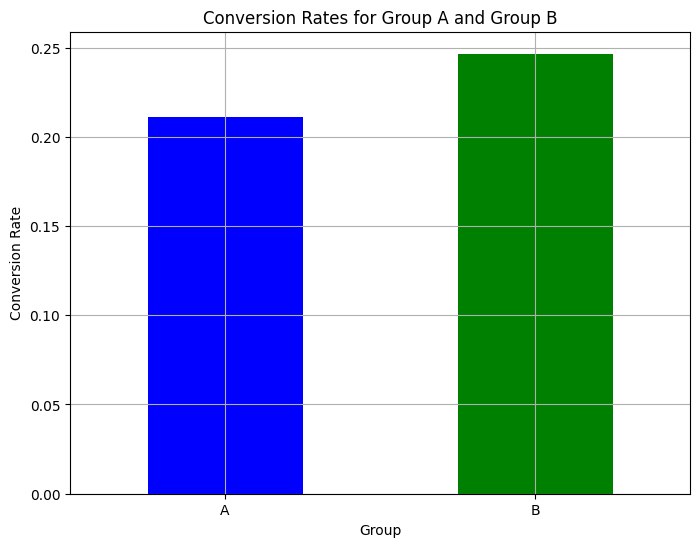

In [3]:
# Conversion rates for A/B groups
conversion_rates = df.groupby('Group')['Conversion'].mean()
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting conversion rates
plt.figure(figsize=(8,6))
conversion_rates.plot(kind='bar', color=['blue', 'green'])
plt.title('Conversion Rates for Group A and Group B')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


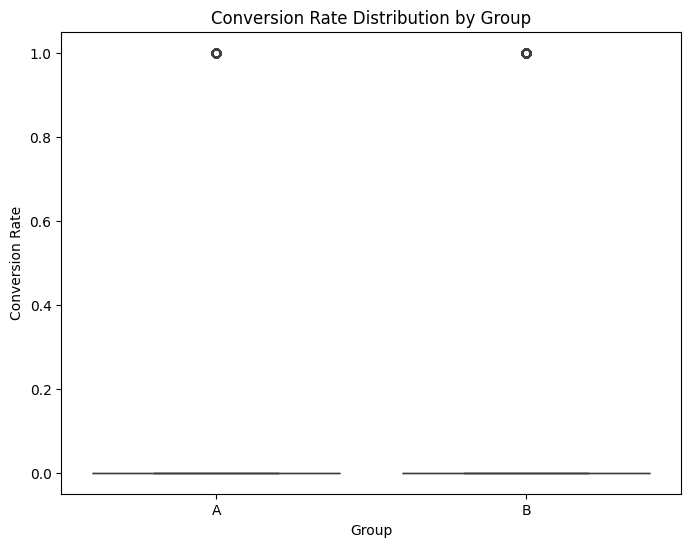

In [6]:
# Box Plot for Conversion Rates by Group
plt.figure(figsize=(8,6))
sns.boxplot(x='Group', y='Conversion', data=df)
plt.title('Conversion Rate Distribution by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


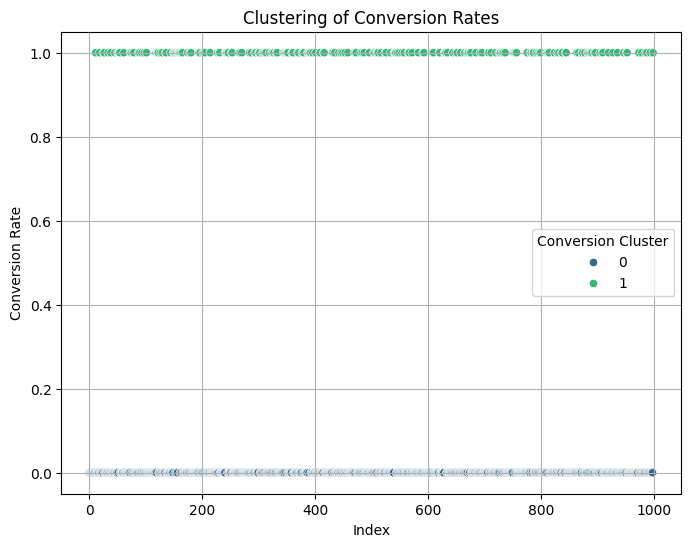

In [8]:
# Clustering (KMeans) on Conversion Data

from sklearn.cluster import KMeans # import the KMeans class from the sklearn.cluster module
kmeans_ab = KMeans(n_clusters=2)
df['Conversion Cluster'] = kmeans_ab.fit_predict(df[['Conversion']])

# Scatter Plot for Clustering Results
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.index, y='Conversion', hue='Conversion Cluster', palette='viridis', data=df)
plt.title('Clustering of Conversion Rates')
plt.xlabel('Index')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()